In [1]:
import sys 
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from src.correlation import NewsStockCorrelation

In [3]:
# Load cleaned news
news_df = pd.read_csv("../data/processed_data/cleaned_news_data.csv")

# Ensure 'date' column exists and convert to datetime
if 'date' in news_df.columns:
    news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')

# Load all stock CSVs into a dictionary
stock_data_dict = {}
data_dir = "../data/yfinance_data"

for file in os.listdir(data_dir):
    if file.endswith(".csv"):
        ticker = file.split("_")[0]  # Extract ticker (e.g., AAPL from AAPL_historical_data.csv)
        df = pd.read_csv(os.path.join(data_dir, file))
        
        # Ensure proper datetime conversion
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        
        stock_data_dict[ticker] = df

print("Loaded stocks:", list(stock_data_dict.keys()))
display(news_df.head())
display(stock_data_dict["AAPL"].head())

Loaded stocks: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']


,Unnamed: 0,headline,url,publisher,date,stock,headline_length,headline_word_count,hour,day_of_week,month,year
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,7,10,Friday,6,2020
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,7,10,Wednesday,6,2020
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,5,4,Tuesday,5,2020
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,7,12,Friday,5,2020
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,14,11,Friday,5,2020


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [4]:

if 'date' in news_df.columns:
    # Convert to datetime, drop timezone, keep only date
    news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce').dt.date

# --- Convert stock data date columns ---
for ticker, df in stock_data_dict.items():
    if 'Date' in df.columns:
        # Convert to datetime, keep only date
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.date

In [5]:
# --- Dictionary to store results ---
results = {}

# --- Iterate over each stock ---
for ticker, df in stock_data_dict.items():
    print(f"Processing {ticker}...")
    

Processing AAPL...
Processing AMZN...
Processing GOOG...
Processing META...
Processing MSFT...
Processing NVDA...
Processing TSLA...


In [ ]:

# Load your news dataset
news_df = pd.read_csv("../data/processed_data/cleaned_news_data.csv")

# Load all stock CSVs from data/yfinance
import glob, os, re

stock_files = glob.glob("../data/yfinance_data/*.csv")

# Dictionary of stock dataframes {ticker: df}
stock_data_dict = {}
for file in stock_files:
    filename = os.path.splitext(os.path.basename(file))[0]  
    ticker = re.split(r'[_-]', filename)[0]  
    
    df = pd.read_csv(file)
    df['ticker'] = ticker
    stock_data_dict[ticker] = df

print("Available tickers:", list(stock_data_dict.keys()))

# Preview
display(news_df.head())
display(stock_data_dict['AAPL'].head())  # Example: now works!


In [6]:
# Create analyzer object
analyzer = NewsStockCorrelation()
    

In [7]:
# Set the data
analyzer.news_data = news_df
analyzer.stock_data = df

In [8]:
# Run analysis
analyzer.normalize_dates()  # handles timestamp vs date alignment
analyzer.analyze_sentiment(headline_column='headline')  # adjust column name if needed
analyzer.calculate_stock_returns(price_column='Close')  # adjust column name if needed
analyzer.align_datasets()

INFO:src.correlation:Found date columns: news='date', stock='Date'
INFO:src.correlation:Dates normalized successfully
INFO:src.correlation:News date range: 2011-04-27 00:00:00 to 2020-06-11 00:00:00
INFO:src.correlation:Stock date range: 2010-06-29 00:00:00 to 2024-07-30 00:00:00
INFO:src.correlation:Sentiment analysis completed successfully
INFO:src.correlation:Stock returns calculated successfully
INFO:src.correlation:Before merge - News data shape: (2528, 2)
INFO:src.correlation:Before merge - Stock data shape: (3544, 11)
INFO:src.correlation:News data columns: ['date', 'sentiment_score']
INFO:src.correlation:Stock data columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits', 'date', 'daily_return']
INFO:src.correlation:News date range: 2011-04-27 00:00:00 to 2020-06-11 00:00:00
INFO:src.correlation:News date dtype: datetime64[ns]
INFO:src.correlation:Sample news dates: [Timestamp('2011-04-27 00:00:00'), Timestamp('2011-04-28 00:00:00'), 

INFO:src.correlation:Plotting correlation with 2226 valid data points


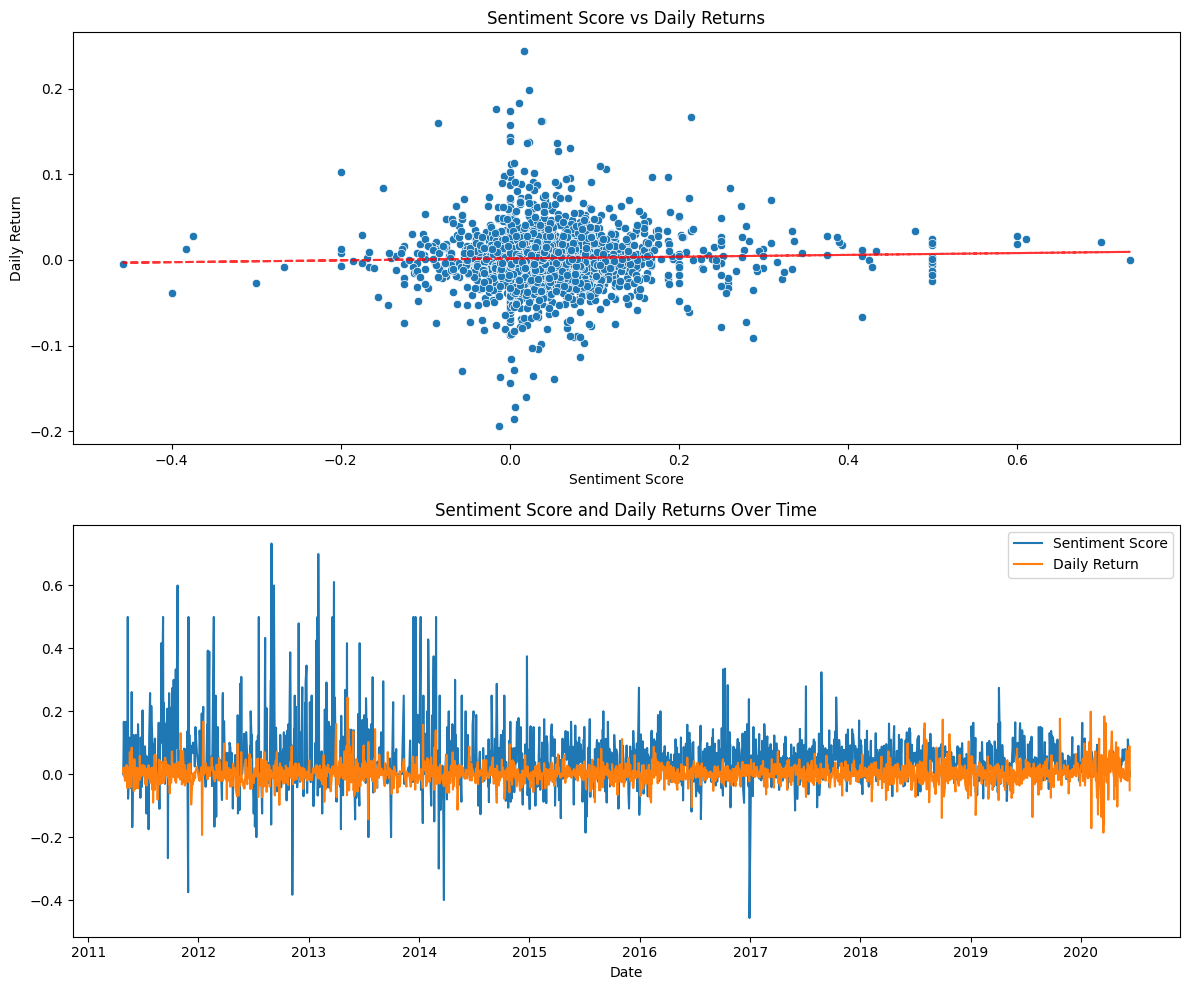

In [9]:
# Step 6: Create the correlation plot
analyzer.plot_correlation()

In [10]:
  # Store correlation and summary stats
results[ticker] = {
        "correlation": analyzer.calculate_correlation(),
        "summary": analyzer.get_summary_statistics()
    }

INFO:src.correlation:Calculating correlation with 2226 valid data points
INFO:src.correlation:Correlation analysis completed successfully


In [11]:
for ticker, res in results.items():
    print(f"\nTicker: {ticker}")
    print("Correlation:", res["correlation"])
    print("Summary stats:\n", res["summary"])


Ticker: TSLA
Correlation: {'same_day_correlation': np.float64(0.027734488849485827), 'next_day_correlation': np.float64(-0.009943597219118363), 'two_day_correlation': np.float64(0.036512469691808734)}
Summary stats:
 {'avg_sentiment': np.float64(0.04338087169538198), 'std_sentiment': np.float64(0.08763572390805005), 'avg_return': np.float64(0.0021450659390100046), 'std_return': np.float64(0.033576947100816254), 'total_days': 2226, 'positive_sentiment_days': np.int64(1493), 'negative_sentiment_days': np.int64(387)}


In [ ]:
analyzer.plot_correlation()

In [ ]:
aligned = analyzer.aligned_data  # should contain 'sentiment' and 'returns' columns
    
if aligned is not None and not aligned.empty:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='sentiment', y='returns', data=aligned)
    plt.title(f'Sentiment vs Stock Returns for {ticker}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Stock Returns')
    plt.grid(True)
    plt.show()
else:
        print(f"No aligned data to plot for {ticker}")